 # Diabetes prediction

The goal is to predict whether or not a patient has diabetes based on certain diagnostic parameters included in the kaggle dataset.


**Importing all the necessary libaries** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

File= '/kaggle/input/diabetes-healthcare-comprehensive-dataset/health care diabetes.csv'


ModuleNotFoundError: No module named 'imblearn'

In [2]:
df= pd.read_csv(File)

# Data Cleaning 

In [3]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Lets check how many null values we have in our data set.**

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Data Manipulation

In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

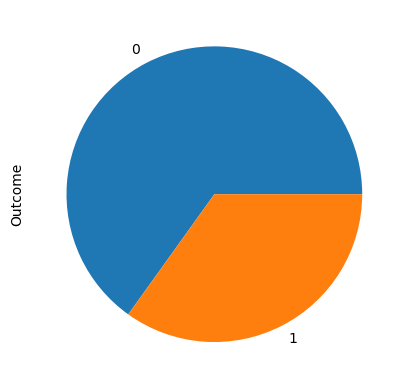

In [8]:
df["Outcome"].value_counts().plot(kind = "pie")
plt.show()

**Because the classes in Outcome are skewed, we will produce fresh samples for the class '1', which is under-represented in our data, using SMOTE.**

In [9]:
X = df.drop("Outcome", axis = 1)
Y = df["Outcome"]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
X_resample, Y_resample = SMOTE(random_state=42).fit_resample(X,Y)

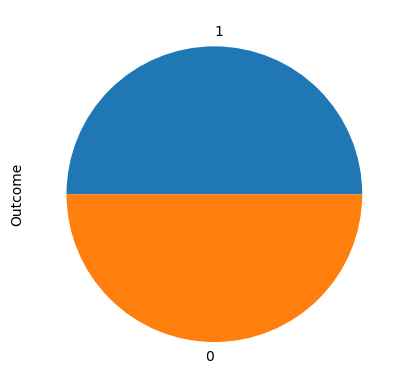

1    500
0    500
Name: Outcome, dtype: int64

In [12]:
Y_resample.value_counts().plot(kind = "pie")
plt.show()

Y_resample.value_counts()

**Now that the data is evenly distributed, we will join this to a new data frame**

In [13]:
dfn = pd.concat([X_resample,Y_resample],axis = 1)
dfn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,5,164,64,0,0,31.906102,0.233595,39,1
996,5,107,69,31,0,35.752773,0.278394,28,1
997,4,171,83,27,154,33.300000,1.196333,51,1
998,8,111,81,32,175,34.173097,0.284266,35,1


**We will plot scatter plots between all variables**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/3669725063.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1500x1500 with 0 Axes>

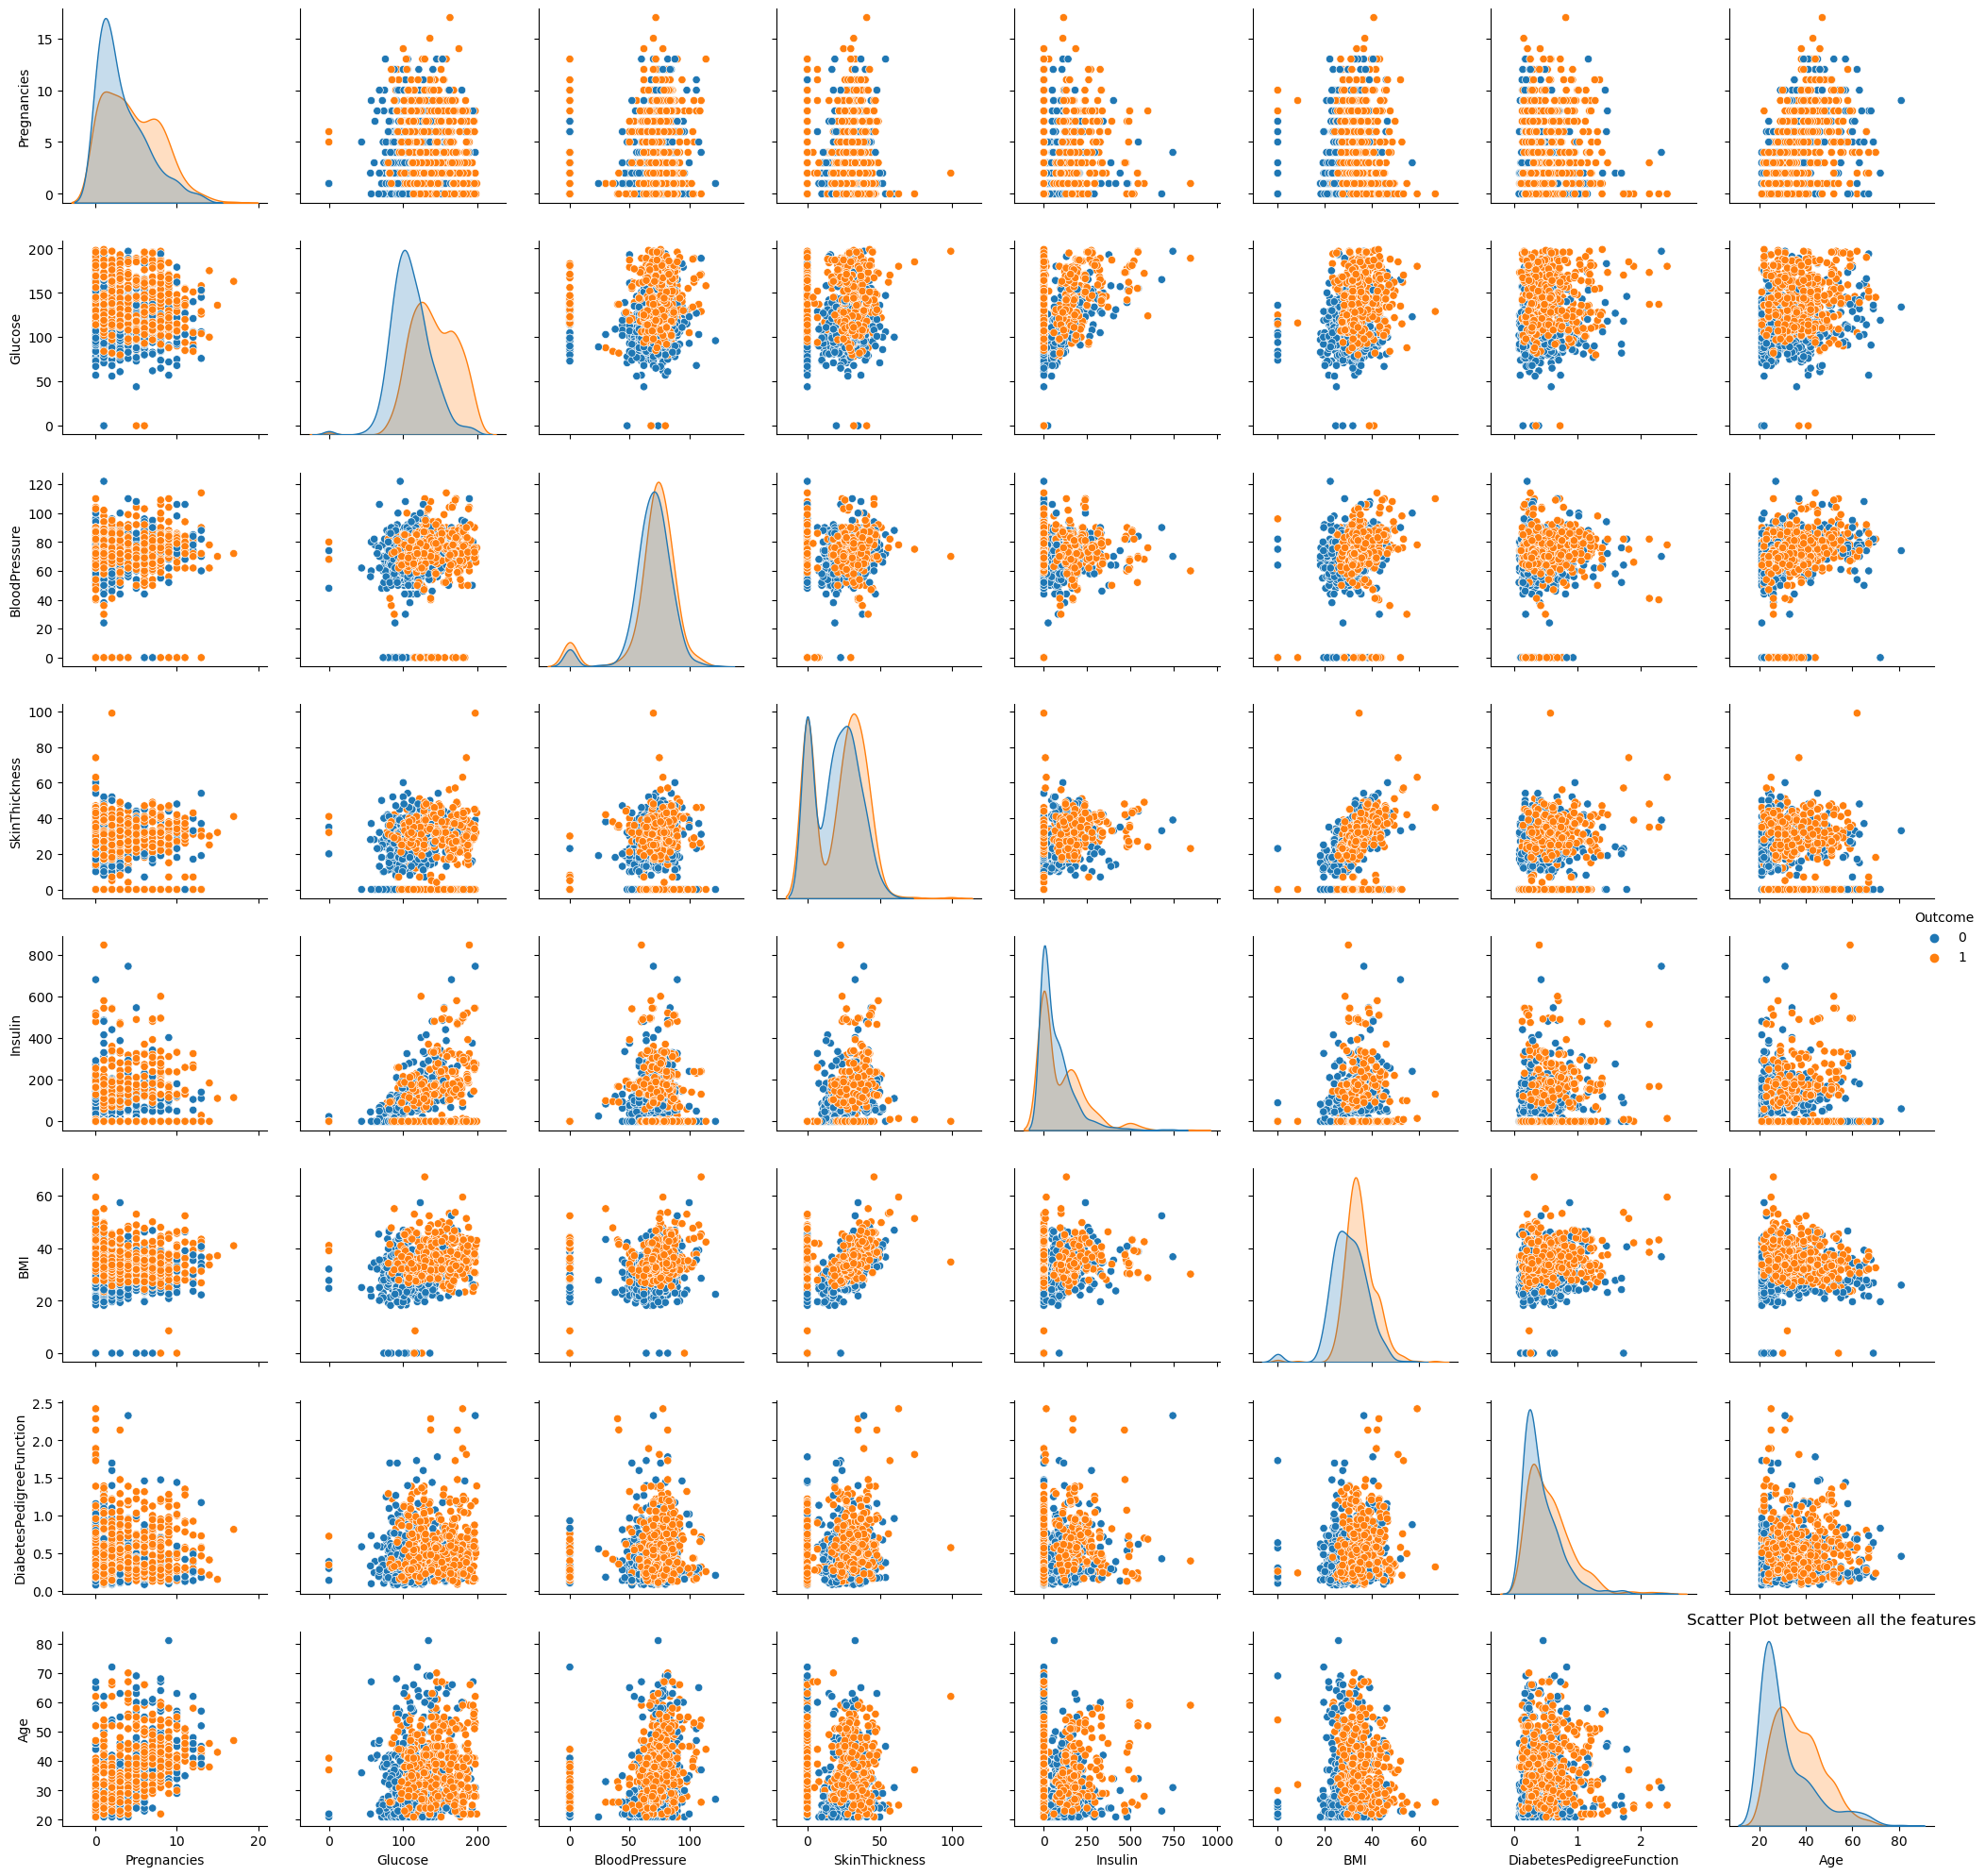

In [14]:
plt.figure(figsize=(15,15))
sns.pairplot(dfn,hue="Outcome")
plt.title("Scatter Plot between all the features")
plt.tight_layout()

**We will plot a heat map to visualize the corrolation between all variables to understand the relationships**

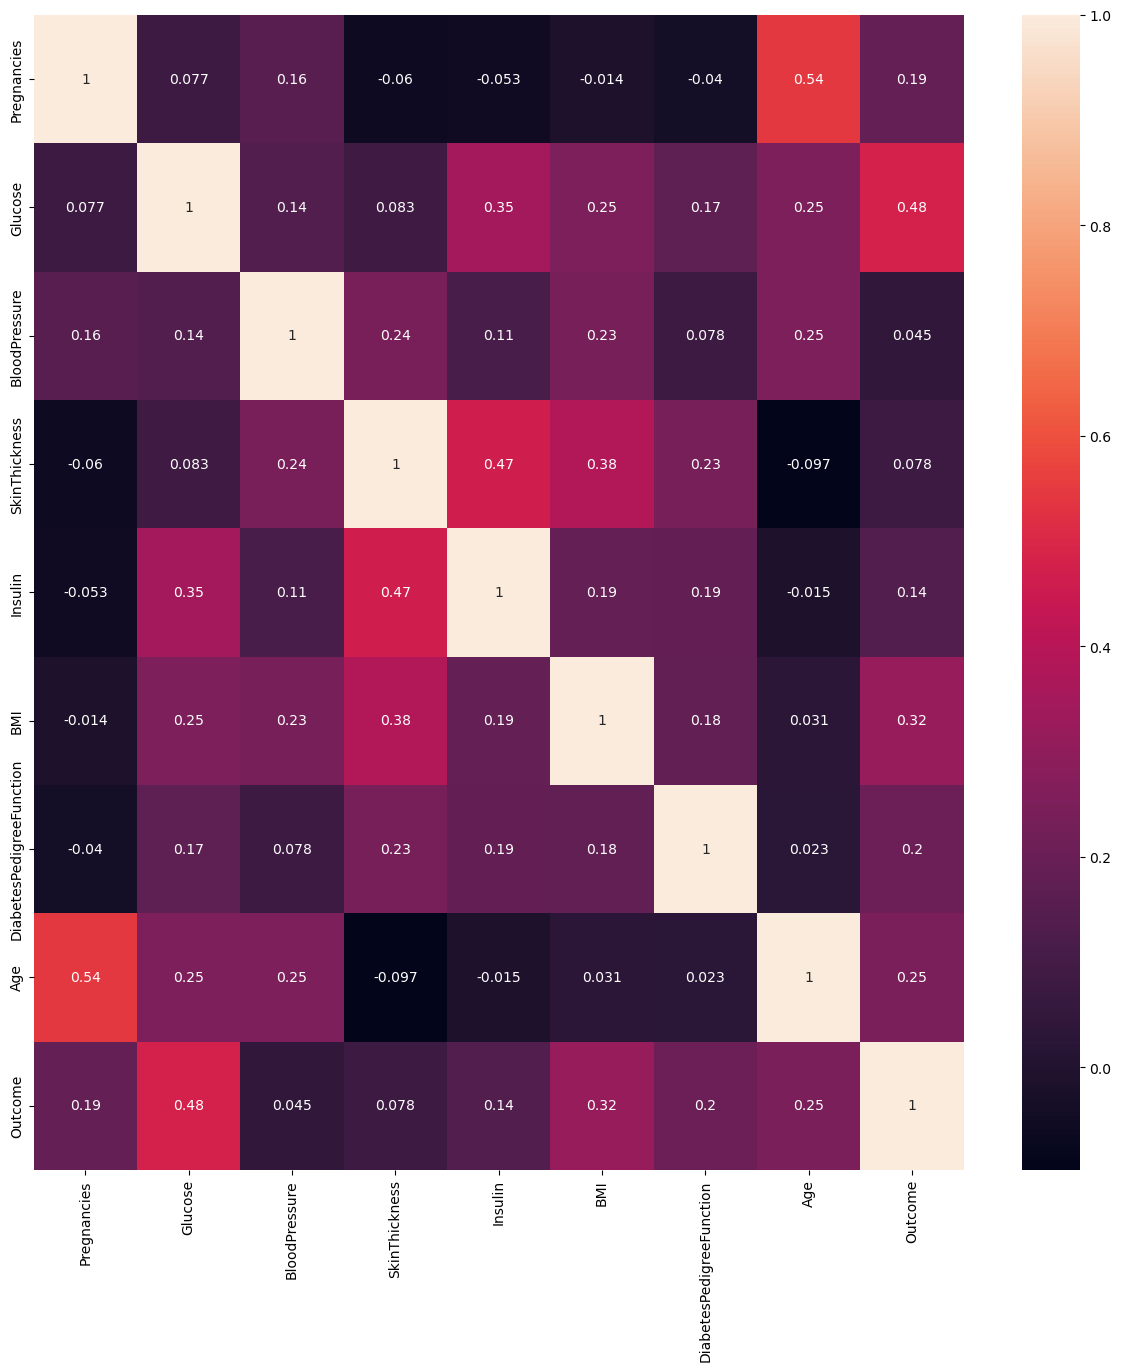

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(dfn.corr(),  annot=True)
plt.show()

In [16]:
dfn.corr()['Outcome'].sort_values()

BloodPressure               0.044593
SkinThickness               0.078461
Insulin                     0.135030
Pregnancies                 0.187696
DiabetesPedigreeFunction    0.203799
Age                         0.245557
BMI                         0.317608
Glucose                     0.481326
Outcome                     1.000000
Name: Outcome, dtype: float64

# Data modeling

***
We will train our data using several classification models and then evaluate their performance on the test data to accurately predict the desired variable "Outcome" using the following features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeF, and Age.

The classification models listed below will be used:

1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. K-Nearest Neighbour 
***



**We will perform Train - Test split on input data**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Logistic Regression

In [19]:
parameters ={"C":np.logspace(-10,50,150),"penalty": ["l1","l2"],"max_iter":[100,400]}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters, cv=10, verbose=0)


In [20]:
logreg_cv.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 2.52746159e-10, 6.38806207e-10, 1.61455815e-09,
       4.08073370e-09, 1.03138977e-08, 2.60679802e-08, 6.58858186e-08,
       1.66523876e-07, 4.20882699e-07, 1.06376485e-06, 2.68862481e-06,
       6.79539592e-06, 1.71751022e-05, 4.34094109e-05, 1.09715619e-04,
       2.77302012e-04, 7.00870182e-04, 1.77142...
       3.49642455e+41, 8.83707874e+41, 2.23353771e+42, 5.64518076e+42,
       1.42679775e+43, 3.60617651e+43, 9.11447260e+43, 2.30364794e+44,
       5.82238167e+44, 1.47158460e+45, 3.71937355e+45, 9.40057378e+45,
       2.37595891e+46, 6.00514488e+46, 1.51777730e+47, 3.83612383e+47,
       9.69565562e+47, 2.45053971e+48, 6.19364499e+48, 1.56541998e+49,
       3.95653887e+49, 1.00000000e+50]),
                         'max_iter': [100, 400], 'penalty': ['l1', 'l2']})

**We will get the optimal hyperparameters then We will then retrain the models using these optimized hyperparameters**

In [21]:
logreg_cv.best_params_

{'C': 4912.190125853841, 'max_iter': 100, 'penalty': 'l2'}

In [22]:
LR= LogisticRegression(C =  4912.190125853841, max_iter =  100)

In [23]:
LR.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=4912.190125853841)

In [24]:
LR.score(X_test,Y_test)

0.7532467532467533

**we will plot a heat map to visualize the confusion matrix**

In [25]:
def plot_cm(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show() 

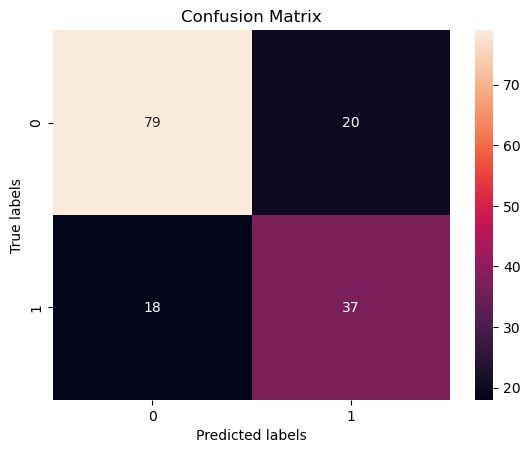

In [26]:
yhat=LR.predict(X_test)
plot_cm(Y_test,yhat)

## Support Vector Machine

In [27]:
svm1 = SVC()


In [28]:
svm1.fit(X_train, Y_train)

SVC()

In [29]:
params_svm = {
'C':[1,5, 10, 15, 20, 25],
'gamma':["scale","auto"]
}

In [30]:
grid_svm = GridSearchCV(svm1,param_grid=params_svm,cv = 10, verbose=0)


In [31]:
grid_svm.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': ['scale', 'auto']})

In [32]:
grid_svm.best_params_

{'C': 5, 'gamma': 'scale'}

In [33]:
svm2 = SVC(C = 5, gamma = "scale", probability=True)


In [34]:
svm2.fit(X_train,Y_train)

SVC(C=5, probability=True)

In [35]:
svm2.score(X_test,Y_test)

0.7662337662337663

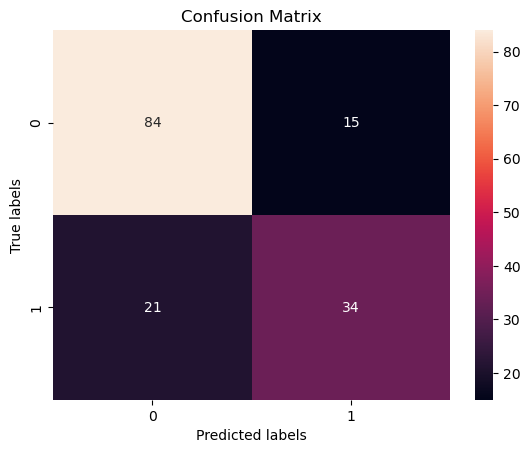

In [36]:
yhat=svm2.predict(X_test)
plot_cm(Y_test,yhat)

## Decision Tree

In [37]:
tree = DecisionTreeClassifier()

In [38]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [39]:
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)]}

In [40]:
tree_cv = GridSearchCV(tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'splitter': ['best', 'random']})

In [41]:
tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [42]:
Tree= DecisionTreeClassifier(criterion='entropy', splitter= 'best', max_depth =4, )

In [43]:
Tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [44]:
Tree.score(X_test,Y_test)

0.7142857142857143

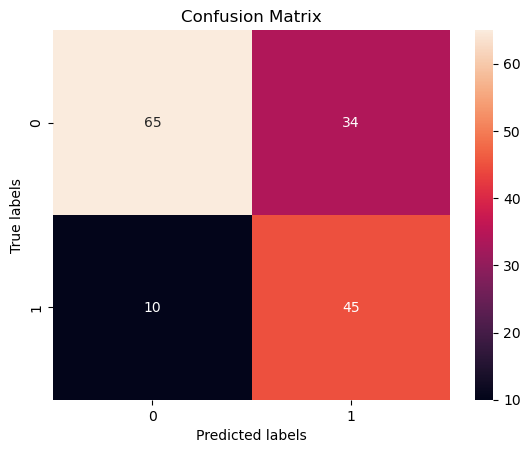

In [45]:
yhat=Tree.predict(X_test)
plot_cm(Y_test,yhat)

## K-Nearest Neighbour 

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [48]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [49]:
knn = GridSearchCV(knn, param_grid=parameters, cv=10)
knn.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [50]:
knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}

In [51]:
Knn= KNeighborsClassifier(n_neighbors= 9, algorithm= 'auto', p=1)

In [52]:
Knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [53]:
Knn.score(X_test,Y_test)

0.7207792207792207

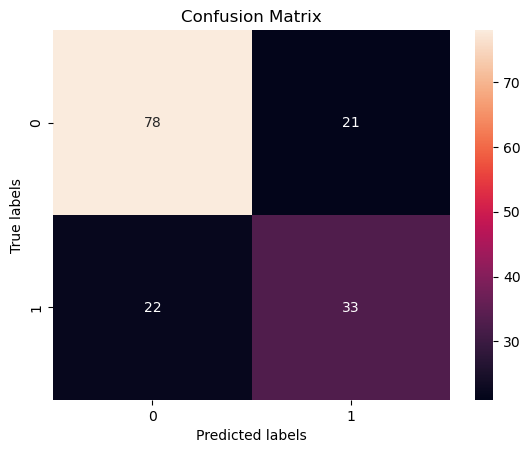

In [54]:
yhat=Knn.predict(X_test)
plot_cm(Y_test,yhat)

**From the models we can see that Support vector machine has the highest accuracy, this will be our final model**

In [55]:
final_model = svm2

We will create a report using our final model toget more insight.

In [56]:
report = classification_report(Y_test,final_model.predict(X_test))

print(report)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



# Dashboard
we created a dashboard in tableau for more visualization.
[<div class='tableauPlaceholder' id='viz1692024843495' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Di&#47;DiabetespredictionDataanalysisandML&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DiabetespredictionDataanalysisandML&#47;Dashboard1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Di&#47;DiabetespredictionDataanalysisandML&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1692024843495');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1000px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1000px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='1200px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>](http://)